In [4]:
import tensorflow as tf

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist
x_train , y_train = x_train_full[:-5000],y_train_full[:-5000]
x_valid , y_valid = x_train_full[-5000:],y_train_full[-5000:]

In [6]:
x_train.shape

(55000, 28, 28)

In [7]:
x_train,x_valid,x_test=x_train/255. , x_valid/255. , x_test/255.

In [8]:
class_names = ["T-shirt/top","Trouser","pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
class_names[y_train[0]]

'Ankle boot'

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))




In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


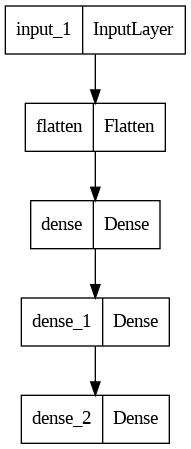

In [12]:
tf.keras.utils.plot_model(model)

In [13]:
model.compile(loss = "sparse_categorical_crossentropy",
optimizer="sgd",metrics="accuracy")

In [14]:
history = model.fit(x_train , y_train , epochs = 30 , validation_data = (x_valid , y_valid))

Epoch 1/30
1719/1719 [==============================] - 18s 9ms/step - loss: 0.7304 - accuracy: 0.7591 - val_loss: 0.5107 - val_accuracy: 0.8238
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4906 - accuracy: 0.8299 - val_loss: 0.4636 - val_accuracy: 0.8334
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4437 - accuracy: 0.8445 - val_loss: 0.4347 - val_accuracy: 0.8456
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4189 - accuracy: 0.8539 - val_loss: 0.3989 - val_accuracy: 0.8598
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3975 - accuracy: 0.8607 - val_loss: 0.3922 - val_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3805 - accuracy: 0.8651 - val_loss: 0.3955 - val_accuracy: 0.8624
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3678 - accuracy: 0.8687 - val_loss: 0.3761 - val_accuracy

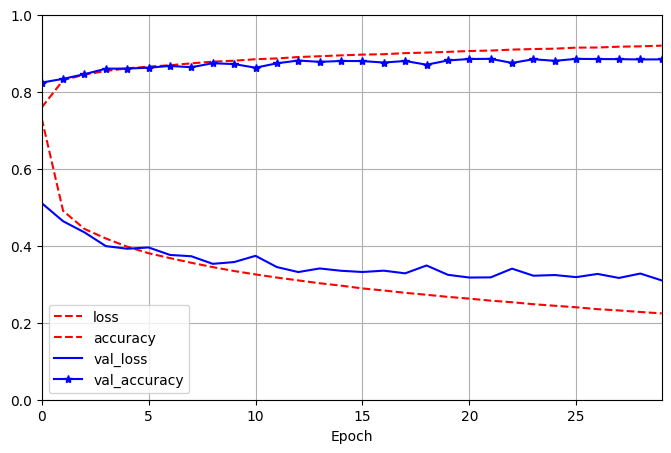

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,29],ylim=[0,1],grid =True,xlabel="Epoch",style=["r--","r--","b-","b-*"]
)
plt.show()

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3245 - accuracy: 0.8849


[0.3245192766189575, 0.8848999738693237]

In [19]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 205ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
import numpy as np
y_pred = y_proba.argmax(axis = -1)
y_pred

array([9, 2, 1])

In [22]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'pullover', 'Trouser'], dtype='<U11')

In [23]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)